# Functions

In the previous lesson we created a plot of the ACCESS1-3 historical precipitation climatology using the following commands:

In [10]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cmocean

import warnings
warnings.filterwarnings('ignore')

In [11]:
%matplotlib inline

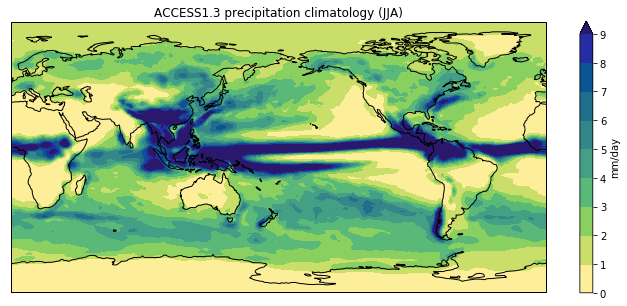

In [13]:
access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

dset = xarray.open_dataset(access_pr_file)

clim = dset['pr'].groupby('time.season').mean(dim='time')

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=numpy.arange(0, 10),
                                     extend='max',
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'label': clim.units},
                                     cmap=cmocean.cm.haline_r)
ax.coastlines()

title = '%s precipitation climatology (JJA)' %(dset.attrs['model_id'])
plt.title(title)

plt.show()

If we wanted to create a similar plot for a different model and/or different month, we could cut and paste the code and edit accordingly. The problem with that (common) approach is that it increases the chances of a making a mistake. If we manually updated the month to 'Mar' for the `cube.extract` command but forgot to update it when calling `plt.title`, for instance, we'd have a mismatch between the data and title. 

The cut and paste approach is also much more time consuming. If we think of a better way to create this plot in future (e.g. we might want to add gridlines using `plt.gca().gridlines()`), then we have to find and update every copy and pasted instance of the code.

A better approach is to put the code in a function. The code itself then remains untouched, and we simply call the function with different input arguments. 

In [14]:
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines
    
    """

    dset = xarray.open_dataset(pr_file)

    clim = dset['pr'].groupby('time.season').mean(dim='time')

    clim.data = clim.data * 86400
    clim.attrs['units'] = 'mm/day'

    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                                          levels=numpy.arange(0, 10),
                                          extend='max',
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'label': clim.units},
                                          cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    title = '%s precipitation climatology (%s)' %(dset.attrs['model_id'], season)
    plt.title(title)
    
    plt.show()

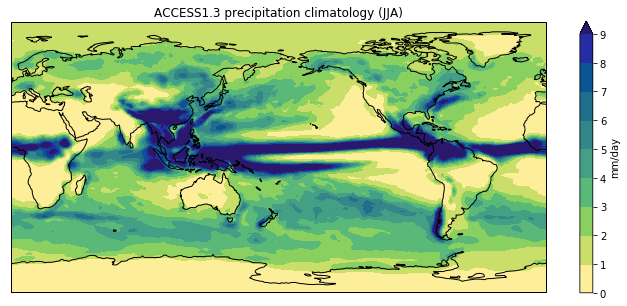

In [15]:
plot_pr_climatology('../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc', 'JJA')

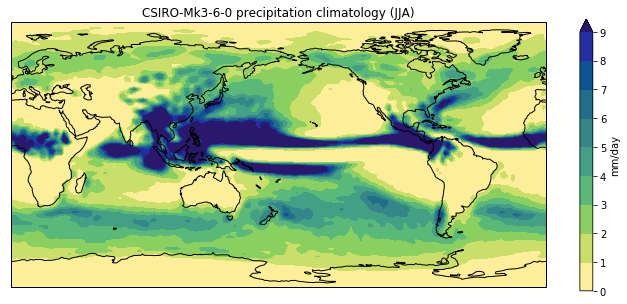

In [8]:
plot_pr_climatology('../data/pr_Amon_CSIRO-Mk3-6-0_historical_r1i1p1_200101-200512.nc', 'JJA')

The docstring allows us to have good documentation for our function:

In [8]:
help(plot_pr_climatology)

Help on function plot_pr_climatology in module __main__:

plot_pr_climatology(pr_file, season, gridlines=False)
    Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines



and the optional input argument allows us to change the default behaviour if need be (keyword arguments are usually used for options that the user will only want to change occasionally). e.g.

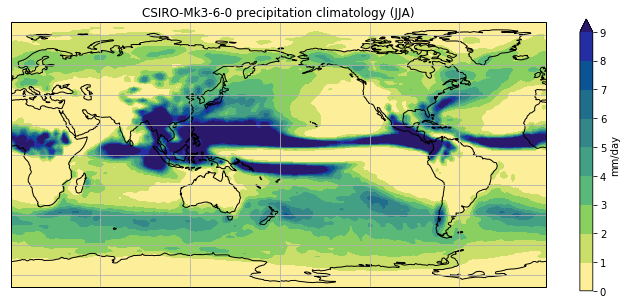

In [16]:
plot_pr_climatology('../data/pr_Amon_CSIRO-Mk3-6-0_historical_r1i1p1_200101-200512.nc',
                    'JJA', gridlines=True)

Our function now works, but at 16 lines of code it's starting to get a little long. In general, people can only fit around 7-12 pieces of information in their short term memory. The readability of your code can therefore be greatly enhanced by keeping your functions short and sharp. The speed at which people can analyse their data is usually limited by the time it takes to read/understand/edit their code (as opposed to the time it takes the code to actually run), so the frequent use of short, well documented functions can dramatically speed up your data science.

**Challenge:** Break the contents of `plot_pr_climatology()` into a series of small functions, such that it reads as follows:
        
```
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines
    
    """

    dset = xarray.open_dataset(pr_file)
    pr_darray = dset['pr']
    
    clim_darray = pr_darray.groupby('time.season').mean(dim='time')
    
    clim_darray = convert_pr_units(clim_darray)

    plot_climatology(clim_darray, dset.attrs['model_id'], season)

```

In other words, you'll need to define new `convert_pr_units()` and `plot_climatology()` functions using code from the existing `plot_pr_climatology()` function.